In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
dataset = pd.read_csv("Consumption of meat per capita.csv")

In [8]:
# data exploration
# step 1: inspect dataset
print(dataset.head())

        Entity  Year   Poultry      Beef  Sheep and goat  Pork  Other meats  \
0  Afghanistan  1961  0.641744  4.889479        8.332486   NaN     0.865845   
1  Afghanistan  1962  0.672726  5.106605        8.072717   NaN     0.896969   
2  Afghanistan  1963  0.673156  5.160862        8.251259   NaN     1.091328   
3  Afghanistan  1964  0.683714  5.132955        8.520909   NaN     1.030673   
4  Afghanistan  1965  0.714625  5.094256        8.820517   NaN     1.082147   

   Fish and seafood  
0          0.030559  
1          0.030578  
2          0.030598  
3          0.030614  
4          0.030627  


In [9]:
# step 2: inspect dataset
print(dataset.tail())

         Entity  Year   Poultry       Beef  Sheep and goat  Pork  Other meats  \
10075  Zimbabwe  2017  5.090000  41.409996        1.810000  0.74     2.500000   
10076  Zimbabwe  2018  4.379997  40.989970        1.819999  0.52     2.389998   
10077  Zimbabwe  2019  4.470001  40.980010        1.770001  0.69     2.370001   
10078  Zimbabwe  2020  7.210003  40.120018        1.760001  0.64     2.270001   
10079  Zimbabwe  2021  7.329998  43.769985        1.909999  0.73     2.229999   

       Fish and seafood  
10075          3.930000  
10076          3.119998  
10077          2.020001  
10078          1.980001  
10079          1.939999  


In [10]:
# step 3: display dataset summary
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            10080 non-null  object 
 1   Year              10080 non-null  int64  
 2   Poultry           10080 non-null  float64
 3   Beef              10079 non-null  float64
 4   Sheep and goat    10080 non-null  float64
 5   Pork              9792 non-null   float64
 6   Other meats       10073 non-null  float64
 7   Fish and seafood  10080 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 630.1+ KB
None


In [11]:
# step 4: displaybasic statistics
print(dataset.describe())

               Year       Poultry          Beef  Sheep and goat         Pork  \
count  10080.000000  10080.000000  10079.000000    10080.000000  9792.000000   
mean    1992.238492     12.545315     11.861681        3.455898    11.687291   
std       17.664153     13.795981     11.281156        6.570487    14.451765   
min     1961.000000      0.000000      0.000000        0.000000     0.000000   
25%     1977.000000      1.985262      4.250644        0.471978     1.063430   
50%     1993.000000      7.303228      8.111460        1.243124     5.348965   
75%     2008.000000     18.781992     16.737870        3.740079    17.406121   
max     2021.000000     89.530410     92.688950       66.910000    78.026120   

        Other meats  Fish and seafood  
count  10073.000000      10080.000000  
mean       1.864093         16.768571  
std        4.600452         17.234011  
min        0.000000          0.000000  
25%        0.099981          5.009638  
50%        0.677016         11.850100  

In [12]:
# step 5: check missing values
missing_values = dataset.isnull().sum()
print("\nmissing_values in each column:")
print(missing_values)


missing_values in each column:
Entity                0
Year                  0
Poultry               0
Beef                  1
Sheep and goat        0
Pork                288
Other meats           7
Fish and seafood      0
dtype: int64


In [13]:
# Step 6: replace missing values
dataset["Beef"] = dataset["Beef"].fillna(dataset["Beef"].mean())
dataset["Pork"] = dataset["Pork"].fillna(dataset["Pork"].mean())
dataset["Other meats"] = dataset["Other meats"].fillna(dataset["Other meats"].mean()) 

In [14]:
# Step 7: Check replaced misssing values
print("\ndataset after replacing missing values:")
print(dataset)


dataset after replacing missing values:
            Entity  Year   Poultry       Beef  Sheep and goat       Pork  \
0      Afghanistan  1961  0.641744   4.889479        8.332486  11.687291   
1      Afghanistan  1962  0.672726   5.106605        8.072717  11.687291   
2      Afghanistan  1963  0.673156   5.160862        8.251259  11.687291   
3      Afghanistan  1964  0.683714   5.132955        8.520909  11.687291   
4      Afghanistan  1965  0.714625   5.094256        8.820517  11.687291   
...            ...   ...       ...        ...             ...        ...   
10075     Zimbabwe  2017  5.090000  41.409996        1.810000   0.740000   
10076     Zimbabwe  2018  4.379997  40.989970        1.819999   0.520000   
10077     Zimbabwe  2019  4.470001  40.980010        1.770001   0.690000   
10078     Zimbabwe  2020  7.210003  40.120018        1.760001   0.640000   
10079     Zimbabwe  2021  7.329998  43.769985        1.909999   0.730000   

       Other meats  Fish and seafood  
0      

In [16]:
# Step 8: Year with hisghest consuption
Highest_Consumption_Year = dataset.set_index("Year").idxmax()
print(Highest_Consumption_Year)

Entity              1961
Poultry             2009
Beef                1976
Sheep and goat      2020
Pork                1989
Other meats         1964
Fish and seafood    2002
dtype: int64


In [17]:
# step 9: Grouping of data into groups of 20 years
bins = [1960, 1980, 2000, 2021]
labels = ["1960-1980", "1981-2000", "2001-2021"]
dataset["Year_group"] = pd.cut(dataset["Year"], bins=bins, labels=labels, right=True)
print(dataset.head(40))

         Entity  Year   Poultry      Beef  Sheep and goat       Pork  \
0   Afghanistan  1961  0.641744  4.889479        8.332486  11.687291   
1   Afghanistan  1962  0.672726  5.106605        8.072717  11.687291   
2   Afghanistan  1963  0.673156  5.160862        8.251259  11.687291   
3   Afghanistan  1964  0.683714  5.132955        8.520909  11.687291   
4   Afghanistan  1965  0.714625  5.094256        8.820517  11.687291   
5   Afghanistan  1966  0.735223  6.953985        9.169866  11.687291   
6   Afghanistan  1967  0.755670  6.494673       10.017728  11.687291   
7   Afghanistan  1968  0.776184  6.924375       10.866570  11.687291   
8   Afghanistan  1969  0.909888  7.146198       10.131448  11.687291   
9   Afghanistan  1970  0.891281  5.767715        9.875803  11.687291   
10  Afghanistan  1971  0.873700  5.632795        9.744324  11.687291   
11  Afghanistan  1972  0.845955  5.405856        7.799288  11.687291   
12  Afghanistan  1973  0.868352  5.437537        8.600818  11.68

In [18]:
bins = [1961, 1980, 2000, 2021]
labels = ["1961-1980", "1981-2000", "2001-2021"]
dataset["Year_group"] = pd.cut(dataset["Year"], bins=bins, labels=labels, right=True)
print(dataset.tail(40))

         Entity  Year   Poultry       Beef  Sheep and goat      Pork  \
10040  Zimbabwe  1982  1.140590   9.013691        0.504686  1.322277   
10041  Zimbabwe  1983  1.183227   7.382525        0.556218  1.415827   
10042  Zimbabwe  1984  1.076335   6.407240        0.741250  1.066181   
10043  Zimbabwe  1985  1.060282   6.433059        0.744237  0.927747   
10044  Zimbabwe  1986  1.054188   7.635186        0.859726  0.941605   
10045  Zimbabwe  1987  1.263081   6.520782        0.944743  1.088508   
10046  Zimbabwe  1988  1.431437   6.333338        0.947426  1.101898   
10047  Zimbabwe  1989  1.590150   6.670371        1.011914  1.146147   
10048  Zimbabwe  1990  1.655069   7.416778        1.086139  1.106827   
10049  Zimbabwe  1991  1.665103   7.260261        1.065252  1.044568   
10050  Zimbabwe  1992  1.578812   7.099493        1.052541  1.021584   
10051  Zimbabwe  1993  1.568201   4.330729        0.986617  0.716595   
10052  Zimbabwe  1994  1.494592   4.536404        1.020954  0.84

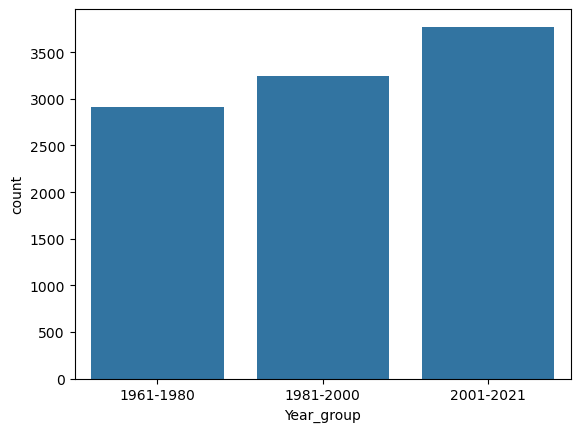

In [104]:
# Step 10: Year group count
sns.countplot(x=dataset.Year_group)
plt.show()

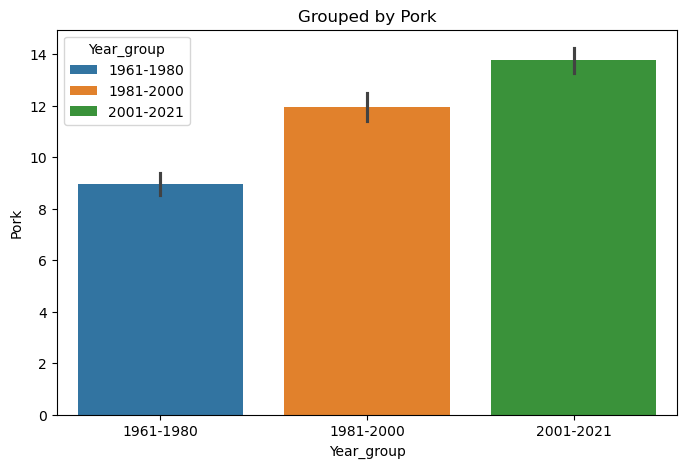

In [52]:
# Step 11:  Bar chart Year grouping of individual meat and fish types
plt.figure(figsize=(8, 5))
sns.barplot(x="Year_group", y="Pork", hue="Year_group", data=dataset)
plt.xlabel("Year_group")
plt.ylabel("Pork")
plt.title("Grouped by Pork")
plt.show()

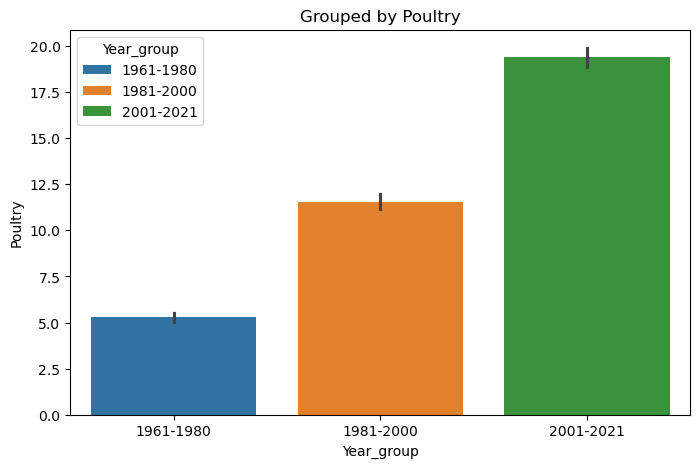

In [64]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Year_group", y="Poultry", hue="Year_group", data=dataset)
plt.xlabel("Year_group")
plt.ylabel("Poultry")
plt.title("Grouped by Poultry")
plt.show()

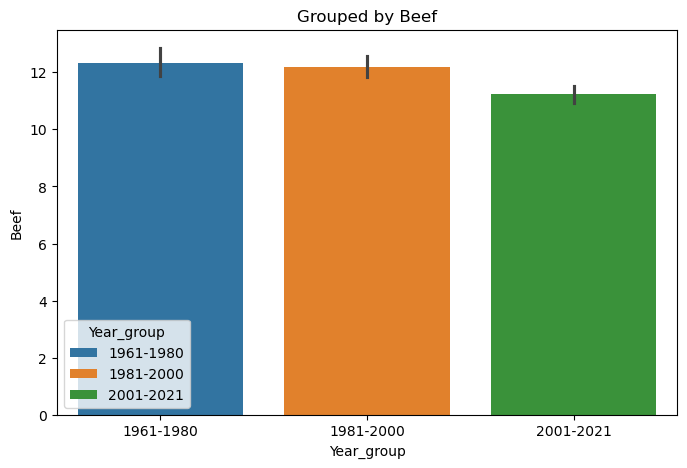

In [66]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Year_group", y="Beef", hue="Year_group", data=dataset)
plt.xlabel("Year_group")
plt.ylabel("Beef")
plt.title("Grouped by Beef")
plt.show()

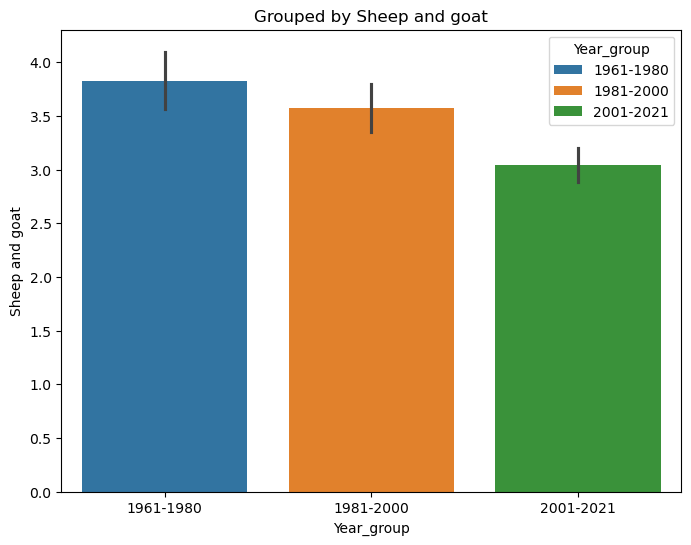

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Year_group", y="Sheep and goat", hue="Year_group", data=dataset)
plt.xlabel("Year_group")
plt.ylabel("Sheep and goat")
plt.title("Grouped by Sheep and goat")
plt.show()

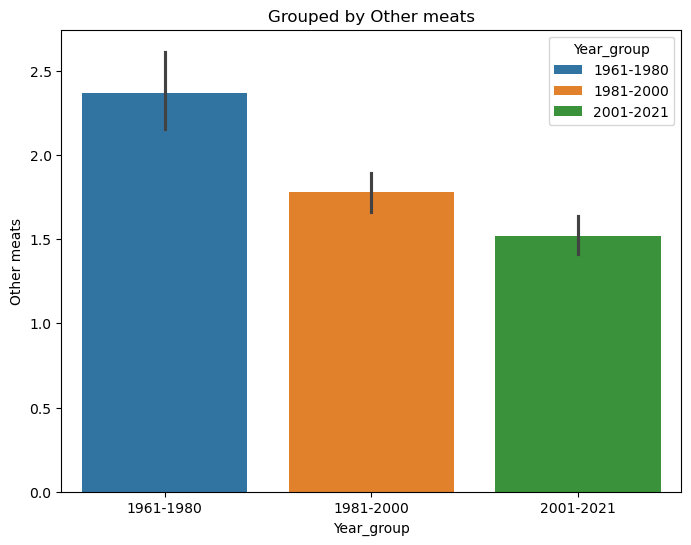

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Year_group", y="Other meats", hue="Year_group", data=dataset)
plt.xlabel("Year_group")
plt.ylabel("Other meats")
plt.title("Grouped by Other meats")
plt.show()

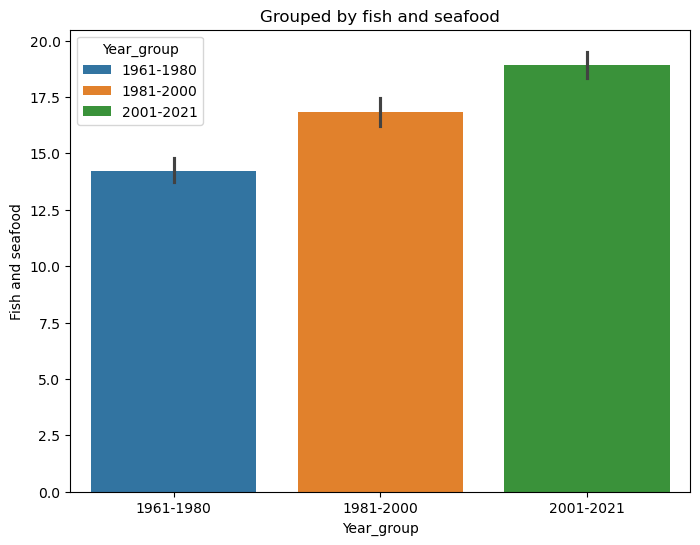

In [74]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Year_group", y="Fish and seafood", hue="Year_group", data=dataset)
plt.xlabel("Year_group")
plt.ylabel("Fish and seafood")
plt.title("Grouped by fish and seafood")
plt.show()

In [100]:
# Step 12: Higest consumption rate by Entity
Highest_Consumption_Entity = dataset.set_index("Entity").idxmax()
print(Highest_Consumption_Entity)

Year                Afghanistan
Poultry                  Kuwait
Beef                New Zealand
Sheep and goat         Mongolia
Pork                    Hungary
Other meats          East Timor
Fish and seafood       Maldives
Year_group          Afghanistan
dtype: object


In [110]:
# Step 13: Exporting of cleaned data
dataset.to_csv("claened_meat_consumption_per_capita_data.csv", index=False)